# DSRM :: Coursework 2

# Introduction

In this assignment, using the PAMAP2 Physical Activity Monitoring dataset, I propose to create a device which will classify current activity for a subject and give recommendations which activity to do next.

The data was collected during the experiment with 9 participants. Each of them did some of 18 different physical activities and wore a heart rate monitor and 3 inertial measurement units (IMU).  All measurement results are in the dataset.

This work consists of three parts: exploratory data analysis (EDA), hypothesis testing and developing an idea about device.

EDA for the PAMAP2 Physical Activity Monitoring dataset starts from cleaning dataset and working out missing values. After that, I explore heart rate data as one of the characteristics of the subject's activity to find out how movements impact on the level of heart rate. Besides, I analyze data from IMU such as temperature, accelerator, magnetometer to find potential features to predict activity thereafter.

I will test the hypothesis if heart rate for folding laundry is equal to a mean of the heart rate value of house cleaning. This helps to understand the importance of heart rate for the hardware.

For the device, I implement two tasks. First, the clustering algorithm to provide recommendations for users in a part of advising new activities to implement. Second, build a model to predict a current activity for the user by heart rate, hand temperature, and magnetometer. 

Data has many dimensions, I apply principal component analysis (PCA) to find out if reducing dimensions will improve performance. I detect that three dimensions suit more this data in predicting activity. This finding I will use in the model testing. 

The actionable insights from the data were found as a complex offer to create a device which will detect user's activity and recommend new movements to make them happier.


Word count: 3854.


Following notations for activities are applied in this work:

1: Lying
2: Sitting
3: Standing
4: Walking
5: Running
6: Cycling
7: Nordic walking
9: Watching TV
10: Computer work
11: Car driving
12: Ascending stairs
13: Descending stairs
16: Vacuum cleaning
17: Ironing
18: Folding lundry
19: House cleaning
20: Playing soccer
24: Rope jumping

## Preliminaries

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats
import seaborn as sns
from pandas.plotting import scatter_matrix
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Exploratory data analysis (EDA)


It gives basic overview of the data properties, and likely generates ideas to followup in subsequent analysis.
EDA has basic workflow is as follows:

1.   Build a Dataframe from the data (upload per subject protocol and optional activities, then put all data in one DataFrame)
2.   Summary statistics for numeric data
3.   Clean the DataFrame:
       * Each row describes a single object
       * Each column desribes a property of that object
       * Columns are numeric whenever appropriate
       * Columns contain atomic properties that cannot be further decomposed
4. Explore global, group properties.

In [5]:
# function to read data for a sample due to given structure.
def read_data(file):
    df = pd.read_csv(filepath_or_buffer = file, sep="\s+", header = None, index_col = None,
                       names=['Timestamp', 'ActivityID', 'Heart_rate_bmp', 'IMU_hand_temperature', 
                              'IMU_hand_3D_acc_16_1', 'IMU_hand_3D_acc_16_2', 'IMU_hand_3D_acc_16_3', 
                               'IMU_hand_3D_acc_6_1', 'IMU_hand_3D_acc_6_2', 'IMU_hand_3D_acc_6_3', 
                               'IMU_hand_3D_gs_1', 'IMU_hand_3D_gs_2', 'IMU_hand_3D_gs_3',
                               'IMU_hand_3D_mn_1', 'IMU_hand_3D_mn_2', 'IMU_hand_3D_mn_3',
                               'IMU_hand_3D_or_1', 'IMU_hand_3D_or_2', 'IMU_hand_3D_or_3', 'IMU_hand_3D_or_4',
                               'IMU_chest_temperature', 
                               'IMU_chest_3D_acc_16_1', 'IMU_chest_3D_acc_16_2', 'IMU_chest_3D_acc_16_3', 
                               'IMU_chest_3D_acc_6_1', 'IMU_chest_3D_acc_6_2', 'IMU_chest_3D_acc_6_3', 
                               'IMU_chest_3D_gs_1', 'IMU_chest_3D_gs_2', 'IMU_chest_3D_gs_3',
                               'IMU_chest_3D_mn_1', 'IMU_chest_3D_mn_2', 'IMU_chest_3D_mn_3',
                               'IMU_chest_3D_or_1', 'IMU_chest_3D_or_2', 'IMU_chest_3D_or_3','IMU_chest_3D_or_4',
                               'IMU_ankle_temperature', 
                               'IMU_ankle_3D_acc_16_1', 'IMU_ankle_3D_acc_16_2', 'IMU_ankle_3D_acc_16_3', 
                               'IMU_ankle_3D_acc_6_1', 'IMU_ankle_3D_acc_6_2', 'IMU_ankle_3D_acc_6_3', 
                               'IMU_ankle_3D_gs_1', 'IMU_ankle_3D_gs_2', 'IMU_ankle_3D_gs_3',
                               'IMU_ankle_3D_mn_1', 'IMU_ankle_3D_mn_2', 'IMU_ankle_3D_mn_3',
                               'IMU_ankle_3D_or_1', 'IMU_ankle_3D_or_2', 'IMU_ankle_3D_or_3', 'IMU_ankle_3D_or_4'])
    return df

In [6]:
#Uploading data info dataframes per subject.

prepath = 'PAMAP2_Dataset'
dfp_101 = read_data(prepath + "\Protocol\subject101.dat")
dfo_101 = read_data(prepath + "\Optional\subject101.dat")
dfp_102 = read_data(prepath + "\Protocol\subject102.dat")
dfp_103 = read_data(prepath + "\Protocol\subject103.dat")
dfp_104 = read_data(prepath + "\Protocol\subject104.dat")
dfp_105 = read_data(prepath + "\Protocol\subject105.dat")
dfo_105 = read_data(prepath + "\Optional\subject105.dat")
dfp_106 = read_data(prepath + "\Protocol\subject106.dat")
dfo_106 = read_data(prepath + "\Optional\subject106.dat")
dfp_107 = read_data(prepath + "\Protocol\subject107.dat")
dfp_108 = read_data(prepath + "\Protocol\subject108.dat")
dfo_108 = read_data(prepath + "\Optional\subject108.dat")
dfp_109 = read_data(prepath + "\Protocol\subject109.dat")
dfo_109 = read_data(prepath + "\Optional\subject109.dat")

In [9]:
#function to print out shapes for protocol and optional dataframes for the same subject
def get_2shapes(df1, df2, sample):
    return print ('Shapes for protocol and optional measurements for subject {}: {}, {} respectively.'.format(sample, df1.shape, df2.shape))

#function to print out a shape of one dataframe
def get_1shape(df1, sample):
    return print ('Shape for a dataframe for the subject {}: {}.'.format(sample, df1.shape))

In [10]:
#function to print out all shapes for two cases: 
#argument opt=1 means to return protocol and optional shapes for all subjects
#argument opt=0 means to return one shape per subject (applied for all subjects)

def get_all_shapes(opt=0):
    if opt == 1:
        get_2shapes(dfp_101, dfo_101, 101)
        get_1shape(dfp_102, 102)
        get_1shape(dfp_103, 103)
        get_1shape(dfp_104, 104)
        get_2shapes(dfp_105, dfo_105, 105)
        get_2shapes(dfp_106, dfo_106, 106)
        get_1shape(dfp_107, 107)
        get_2shapes(dfp_108, dfo_108, 108)
        get_2shapes(dfp_109, dfo_109, 109)
    else:  
        get_1shape(dfp_101, 101)
        get_1shape(dfp_102, 102)
        get_1shape(dfp_103, 103)
        get_1shape(dfp_104, 104)
        get_1shape(dfp_105, 105)
        get_1shape(dfp_106, 106)
        get_1shape(dfp_107, 107)
        get_1shape(dfp_108, 108)
        get_1shape(dfp_109, 109)

In [11]:
get_all_shapes(1)

Shapes for protocol and optional measurements for subject 101: (376417, 54), (319352, 54) respectively.
Shape for a dataframe for the subject 102: (447000, 54).
Shape for a dataframe for the subject 103: (252833, 54).
Shape for a dataframe for the subject 104: (329576, 54).
Shapes for protocol and optional measurements for subject 105: (374783, 54), (154773, 54) respectively.
Shapes for protocol and optional measurements for subject 106: (361817, 54), (129963, 54) respectively.
Shape for a dataframe for the subject 107: (313599, 54).
Shapes for protocol and optional measurements for subject 108: (408031, 54), (180412, 54) respectively.
Shapes for protocol and optional measurements for subject 109: (8477, 54), (193472, 54) respectively.


Most protocol datasets contains 300-400K,  less records for subject 103 as much as 252K, whereas subject 109 on protocol activities has extreamly poor data 8,5K rows only. Optional measurements contain a lot of data, so it will be usefull to include it into EDA.

In [12]:
len_p = len(dfp_101)+len(dfp_102)+len(dfp_103)+len(dfp_104)+len(dfp_105)+len(dfp_106)+len(dfp_107)+len(dfp_108)+len(dfp_109)
len_o = len(dfo_101)+len(dfo_105)+len(dfo_106)+len(dfo_108)+len(dfo_109)
print('Total protocol data: {}, optional data: {} records.'.format(len_p, len_o))

Total protocol data: 2872533, optional data: 977972 records.


## Missing values and summary stats 

### NaN values per subject (protocol and optional)

In [14]:
df_info = [dfp_101.isnull().sum(), dfo_101.isnull().sum(), dfp_102.isnull().sum(), dfp_103.isnull().sum(),
           dfp_104.isnull().sum(), dfp_105.isnull().sum(), dfo_105.isnull().sum(), dfp_106.isnull().sum(),
           dfo_106.isnull().sum(), dfp_107.isnull().sum(), dfp_108.isnull().sum(), dfo_108.isnull().sum(),
           dfp_109.isnull().sum(), dfo_109.isnull().sum()]
df_info_null = pd.concat([df_info[0], df_info[1], df_info[2], df_info[3], df_info[4], df_info[5], df_info[6], df_info[7], df_info[8], 
                          df_info[9], df_info[10], df_info[11], df_info[12], df_info[13]], axis = 1, ignore_index = True)
df_info_null.columns = ['101', '101o', '102', '103', '104', '105', '105o', '106', '106o', '107', '108', '108o', '109', '109o']
#df_info_null
total = len_p + len_o
df_nul_p = pd.DataFrame(df_info_null.agg(sum)*100/total, columns = ['% of NaN'])
df_nul_p

,% of NaN
101,10.335216
101o,7.953814
102,13.004580
103,6.510341
104,9.334802
105,10.536826
105o,3.711773
106,9.746254
106o,3.219188
107,8.636607


In [ ]:
#% NaN in whole data for all subjects per property

df_info_null.sum(axis=1)*100/total

Timestamp and Activity ID has no  missing values, whereas all other parameters have. Datasets contain 4-13% missing values.

Heart rate parameter has huge amount of NaN values 90.9% of total data. The reason is HR-monitor which has samling frequency 9Hz only while others sensors work on ~100Hz.  The best issue is to replace those values, because removing such huge amount of data is not appropriate.

They used wireless IMU sensors , so missing data because of lost WiFi signal or sensor problems. Data from IMU sensors contain very little percent of missing values (less 0,04%), hence it could be deleted.

#### Zero values

In [16]:
df_info = [dfp_101.isin([0]).sum(),
           dfo_101.isin([0]).sum(),
           dfp_102.isin([0]).sum(),
           dfp_103.isin([0]).sum(),
           dfp_104.isin([0]).sum(),
           dfp_105.isin([0]).sum(),
           dfo_105.isin([0]).sum(),
           dfp_106.isin([0]).sum(),
           dfo_106.isin([0]).sum(),
           dfp_107.isin([0]).sum(),
           dfp_108.isin([0]).sum(),
           dfo_108.isin([0]).sum(),
           dfp_109.isin([0]).sum(),
           dfo_109.isin([0]).sum()]
df_info_zero = pd.concat([df_info[0], df_info[1], df_info[2], df_info[3], df_info[4], df_info[5], df_info[6], df_info[7], df_info[8], 
                          df_info[9], df_info[10], df_info[11], df_info[12], df_info[13]], axis = 1, ignore_index = True)
df_info_zero.columns = ['101', '101o', '102', '103', '104', '105', '105o', '106', '106o', '107', '108', '108o', '109', '109o']
#df_info_zero

Zero values are located in the columns which are advised to remove due to dataset description. It will be done at the next steps.

#### Data types, duplicated rows

In [17]:
pd.DataFrame({'101': [set(dfp_101.dtypes.tolist()), dfp_101.duplicated(keep=False).sum()],
       '101o': [set(dfo_101.dtypes.tolist()), dfo_101.duplicated(keep=False).sum()],
       '102': [set(dfp_102.dtypes.tolist()), dfp_102.duplicated(keep=False).sum()],
       '103': [set(dfp_103.dtypes.tolist()), dfp_103.duplicated(keep=False).sum()],
       '104': [set(dfp_104.dtypes.tolist()), dfp_104.duplicated(keep=False).sum()],
       '105': [set(dfp_105.dtypes.tolist()), dfp_105.duplicated(keep=False).sum()],
       '105o': [set(dfo_105.dtypes.tolist()), dfo_105.duplicated(keep=False).sum()],
       '106': [set(dfp_106.dtypes.tolist()), dfp_106.duplicated(keep=False).sum()],
       '106o': [set(dfo_106.dtypes.tolist()), dfo_106.duplicated(keep=False).sum()],
       '107': [set(dfp_107.dtypes.tolist()), dfp_107.duplicated(keep=False).sum()],
       '108': [set(dfp_108.dtypes.tolist()), dfp_108.duplicated(keep=False).sum()],
       '108o': [set(dfo_108.dtypes.tolist()), dfo_108.duplicated(keep=False).sum()],
       '109': [set(dfp_109.dtypes.tolist()), dfp_109.duplicated(keep=False).sum()],
       '109o': [set(dfo_109.dtypes.tolist()), dfo_109.duplicated(keep=False).sum()]
      })

,101,101o,102,103,104,105,105o,106,106o,107,108,108o,109,109o
0,"{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}","{int64, float64}"
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


All data has numeric types, hence, no need to care about type conversion ( string, date, etc.). There are no duplications.

### Merge protocol and optional datasets

Merge dataframes for subjects which have optional dataset in addition to protocol measurements with the outer join method, hence, it will yield the union of the two DataFrames, so all rows are represented, with missing values inserted as appropriate. 


---

As it is known there is not intersection between protocol and optional data (in activities), outer join method was chosen. This step will help to analyze data per subject together if applicable during further work on the assignment.

In [18]:
dfp_101 = pd.merge(dfp_101, dfo_101, how = 'outer')
dfp_105 = pd.merge(dfp_105, dfo_105, how = 'outer')
dfp_106 = pd.merge(dfp_106, dfo_106, how = 'outer')
dfp_108 = pd.merge(dfp_108, dfo_108, how = 'outer')
dfp_109 = pd.merge(dfp_109, dfo_109, how = 'outer')

### Handle missing/dirty data 

1. According dataset description I exclude from dataset the IMU data columns 5-7 (3D-acceleration data (ms-2), scale: ±6g) and 14-17 (orientation) due to its useless for the task. 

2. Ignore data labeled with Activity_ID = 0 as these data covers transient activities between performing different activities. 

3. Detete all missing values accept Heart rate data (as there is data collection issues due to the sampling frequency, it will be covered within next step). 

4. Since data is given every 0.01s (due to the fact, that the IMUs have a sampling frequency of 100Hz), and the sampling frequency of the HR-monitor was only approximately 9Hz, the missing HR-values is going to be replaced with values using interpolation method. For the first NaN values before measured Heart rate occured, NaN will be replaces with first valid value.


In [19]:
# a general function for all described above.
def clean_data(df):
    df.drop(['IMU_chest_3D_acc_6_1', 'IMU_chest_3D_acc_6_2', 'IMU_chest_3D_acc_6_3', 'IMU_hand_3D_acc_6_1', 'IMU_hand_3D_acc_6_2',
       'IMU_hand_3D_acc_6_3', 'IMU_ankle_3D_acc_6_1', 'IMU_ankle_3D_acc_6_2', 'IMU_ankle_3D_acc_6_3', 'IMU_ankle_3D_or_1', 'IMU_ankle_3D_or_2', 'IMU_ankle_3D_or_3',
       'IMU_ankle_3D_or_4', 'IMU_hand_3D_or_1', 'IMU_hand_3D_or_2',
       'IMU_hand_3D_or_3', 'IMU_hand_3D_or_4', 'IMU_chest_3D_or_1', 'IMU_chest_3D_or_2',
       'IMU_chest_3D_or_3', 'IMU_chest_3D_or_4'], axis = 1, inplace = True)
    df.drop(df[df.ActivityID == 0].index, inplace = True)
    df.drop_duplicates()
    df.dropna(0, subset = ['IMU_hand_temperature', 'IMU_hand_3D_acc_16_1',
       'IMU_hand_3D_acc_16_2', 'IMU_hand_3D_acc_16_3', 'IMU_hand_3D_gs_1',
       'IMU_hand_3D_gs_2', 'IMU_hand_3D_gs_3', 'IMU_hand_3D_mn_1',
       'IMU_hand_3D_mn_2', 'IMU_hand_3D_mn_3', 'IMU_chest_temperature',
       'IMU_chest_3D_acc_16_1', 'IMU_chest_3D_acc_16_2',
       'IMU_chest_3D_acc_16_3', 'IMU_chest_3D_gs_1', 'IMU_chest_3D_gs_2',
       'IMU_chest_3D_gs_3', 'IMU_chest_3D_mn_1', 'IMU_chest_3D_mn_2',
       'IMU_chest_3D_mn_3', 'IMU_ankle_temperature', 
       'IMU_ankle_3D_acc_16_1', 'IMU_ankle_3D_acc_16_2',
       'IMU_ankle_3D_acc_16_3', 'IMU_ankle_3D_gs_1', 'IMU_ankle_3D_gs_2',
       'IMU_ankle_3D_gs_3', 'IMU_ankle_3D_mn_1', 'IMU_ankle_3D_mn_2',
       'IMU_ankle_3D_mn_3'], inplace = True)
    #filling missing values using interpolation
    df.interpolate(inplace = True)
    df.fillna(method = 'bfill', inplace = True)
    #df.groupby(['ActivityID'])['Heart_rate_bmp'].mean()    
    
     
    return df

In [20]:
#clean every dataframe per subject
dfp_101 = clean_data(dfp_101)
dfp_102 = clean_data(dfp_102)
dfp_103 = clean_data(dfp_103)
dfp_104 = clean_data(dfp_104)
dfp_105 = clean_data(dfp_105)
dfp_106 = clean_data(dfp_106)
dfp_107 = clean_data(dfp_107)
dfp_108 = clean_data(dfp_108)
dfp_109 = clean_data(dfp_109)

## Concatenate all datasets in one dataframe 

As each dataset per subject is cleaned already,  concatenate all in one dataset for more convenient analysis. To have possibitity devide subjects in total dataset add column 'NS' (Number of subject).

In [22]:
  dfp_101['NS'] = 101
  dfp_102['NS'] = 102
  dfp_103['NS'] = 103
  dfp_104['NS'] = 104
  dfp_105['NS'] = 105
  dfp_106['NS'] = 106
  dfp_107['NS'] = 107
  dfp_108['NS'] = 108
  dfp_109['NS'] = 109

  
def concat_all(dfp_101, dfp_102, dfp_103, dfp_104, dfp_105, dfp_106, dfp_107, dfp_108, dfp_109):
    return pd.concat([dfp_101, dfp_102, dfp_103, dfp_104, dfp_105, dfp_106, dfp_107, dfp_108, dfp_109], ignore_index = True)

dfp = concat_all(dfp_101, dfp_102, dfp_103, dfp_104, dfp_105, dfp_106, dfp_107, dfp_108, dfp_109)
dfp.shape

(2701010, 34)

## Correlation within dataset

Text(0.5, 1.0, 'Correlation between values in total dataset')

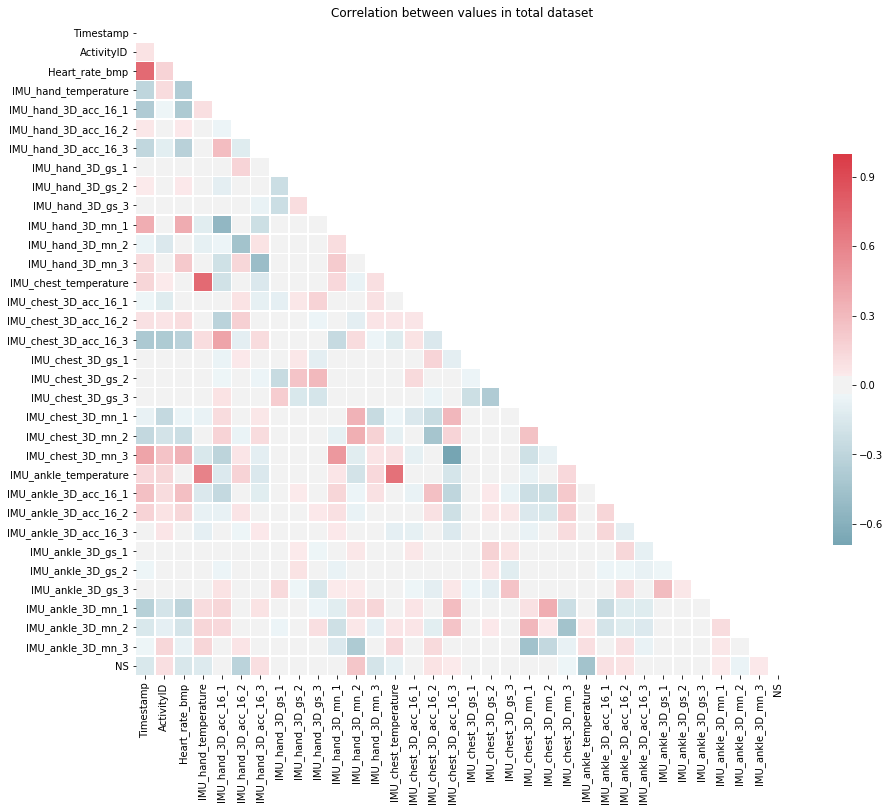

In [24]:
#Plotting disgonal correlation matrix for all data

corr = dfp.corr('pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = False, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .6})

plt.title('Correlation between values in total dataset')

As I have not started to explore data, then predict that it has normal distribution and use default method of correlation Pearson's.
Looking at the correlation table it can be observed that data not much correlated, olny few properties shows strong correlation. 
Majority of properties have negative correlation, what means how uncorrelated they are.
Strong correlation (0.6-0.74) shows:

*   Heart_rate and  Timestamp
*   Chest  and  hand temperature
*   Ankle  and  hand temperature
*   Ankle  and  chest temperature

Less correlated with a coefficient a bit more than 0.4:
*   IMU_chest_3D_mn_3 and  Timestamp
*   IMU_hand_3D_acc_1 and  IMU_chest_3D_acc_3
*   IMU_hand_3D_mn_1 and IMU_chest_3D_mn_3

Others variables shows less than 0.4 correlation.


Therefore, variables with high correlation will be more useful for detecting activity, but data from accelerometor, gyroscope, magnitometor will be transforms later due to specifics of collection.


## Heart rate analysis

Heart rate is an essential atribute for any activity, also by heart rate we can understand how many calories subject burn, because it is known, when person relaxing and has normal heart rate, but as soon as he/she is starting, for instance,  to run heart rate increases and slevel of burned calories rise also.

Explore data in column Heart_rate in the dataset.

### Overview Heart rate data

Plot a histogram, boxplot, probability plot to see a general Heart_rate data distribution.

Text(0.5, 0, 'Heart rate')

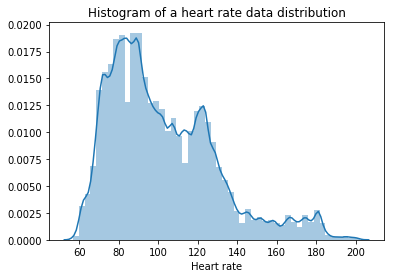

In [27]:
lm = sns.distplot(dfp.Heart_rate_bmp)
ax = plt.gca()
ax.set_title("Histogram of a heart rate data distribution")
plt.xlabel("Heart rate")

To see outliers in the heart rate data, present a box plot:

Text(0, 0.5, 'Heart rate')

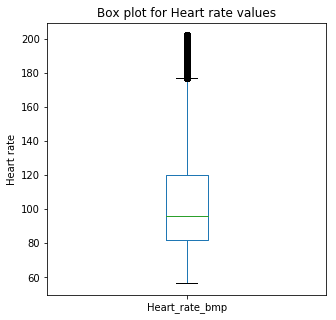

In [33]:
mpl.rc("figure", figsize=(5, 5))
dfp[['Heart_rate_bmp']].plot.box()
plt.title("Box plot for Heart rate values")
plt.ylabel("Heart rate")

Plot probability extimation to theoretical value to understand how it fits the data:

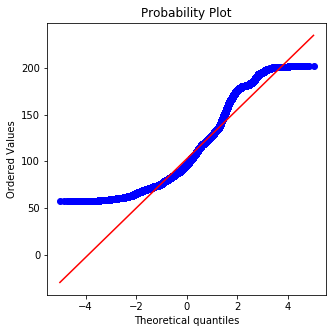

In [34]:
stats.probplot(dfp['Heart_rate_bmp'], dist="norm", plot=pylab)
pylab.show()

Although, data distributed not perfectly normal, majority activities cause a heart rate in a range 80-120 bpm, as values are normally should be in the range 50-200 and those are fit the theoretical line well on probability plot, hence, consider  Heart rate data as comparatively normal distributed. 
It can be seen from histogram that intuitively data could be splitted for two datasets and then it has a chance to be considered as perfectly normal, but our assignment not required such deep analysis.

In [50]:
dfp['Heart_rate_bmp'].mean(), dfp['Heart_rate_bmp'].median()

(102.5376026005087, 96.0)

As the mean (102,5) and median (value 96) of a heart rate have not a big difference, therefore, no essential displacement in Heart rate distribution.

### Analyse relationships between Heart rate and time

Plot a two-dimensional visualization of the data Heart rate and time distributions for subject 101(as he did a lot of activities: protocol and optional):

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0.5, 0, 'Heart rate')

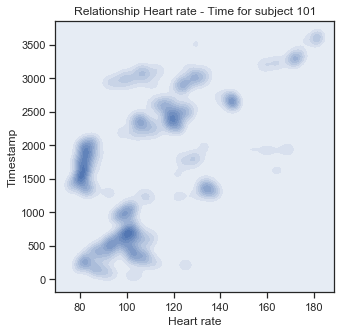

In [35]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

df_temp = dfp_101[['Heart_rate_bmp', 'Timestamp']]
sns.kdeplot(df_temp, shade = True);
plt.title('Relationship Heart rate - Time for subject 101')
plt.ylabel('Timestamp')
plt.xlabel('Heart rate')

According to the plot above it is possible to say that more activities had a heart rate at the level 80, 100 and 120 bmp, as it can be observed more dark colour there, hence, more concentrated data is at those points.
So at the first part of the experiment, a subject had the lowest level of heart rate (50-110) and there were four activities after he started to do more intensive activities which increased his heart rate up to 135bpm and then he reduced active actions,  which cut down the heart rate to 120bpm. Following activities rose heart rate up to 185pm. 
Thus, heart rate and time does not have strong relationship.

### Heart rate during activities

I plot all heart rate distributions by activities to see how the values in the data are spread out. A boxplot is the best way of displaying the distribution of data based on five-number summaries, such as minimum value, first quartile, median, third quartile and maximum. I check outliers and what their values are if any. Also to understand if data is symmetrical, how tightly data is grouped among subjects. Boxplots will show if and how the heart rate data is skewed.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


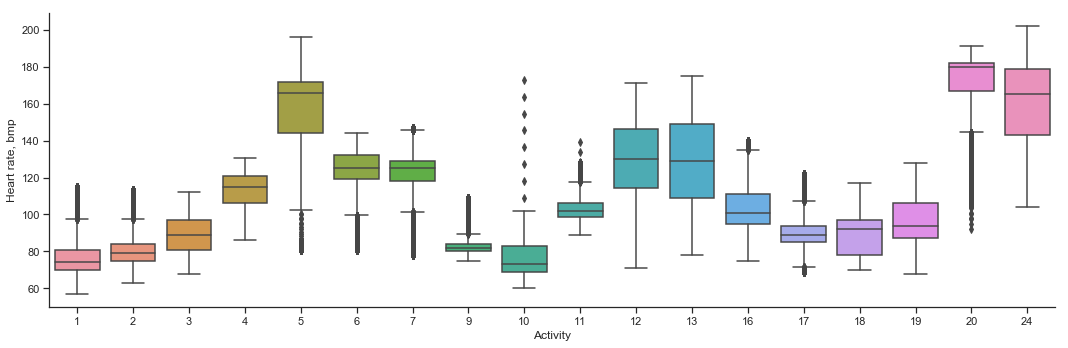

In [38]:
mpl.rc("figure", figsize=(45, 10))

with sns.axes_style(style='ticks'):
    g = sns.factorplot("ActivityID", "Heart_rate_bmp", data=dfp, kind = 'box', size=5, aspect=3)
    g.set_axis_labels("Activity", "Heart rate, bmp")
       
   

Normal symmetric distribution has data for activities 3, 6, 11, 12,13, 17; the data is a bit skewed for other activities. For example, one part of the box is shorter than the other with respect to its median.

Activity #9 has less data than other activities.

Black points over whiskers represent outliers.

Density plot can show a distribution for one variable. Plot it for heart rate, to see an impact of this property for all activities. 

In [65]:
# function to plot a density plot 

# choose data with more that 100 measurements
def density_plot(dfp, col_name, name):
  types = dfp.dropna(subset = [col_name])
  types = types['ActivityID'].value_counts()
  types = list(types[types.values > 100].index)
  mpl.rc("figure", figsize=(10, 6))
  
# Plot each activity
  for b_type in types:
    # Select the activity type
      subset = dfp[dfp['ActivityID'] == b_type]
    
    # Density plot 
      sns.kdeplot(subset[col_name].dropna(), label = b_type, shade = False, alpha = 0.8)
    
# label the plot
  plt.xlabel(name, size = 20); plt.ylabel('Density', size = 20)
  plt.title('Density Plot of '+name+' by Activity Type', size = 28)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


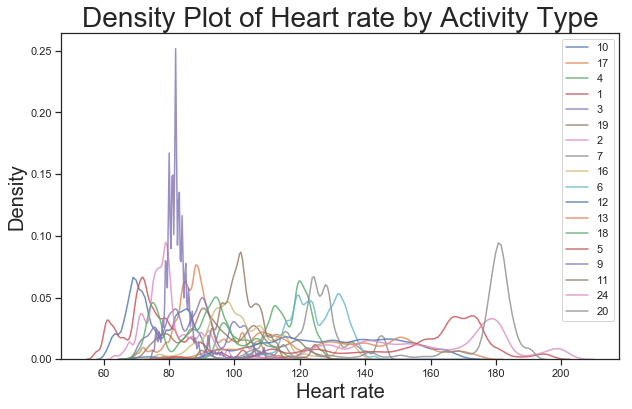

In [66]:
density_plot(dfp, 'Heart_rate_bmp', 'Heart rate')

A heart rate has big impact on type of activity (histograms don't lay over each other perfectly), hence this parameter is good to use for the model.

### Analyse heart rate for every activity to see any unusual data behavior

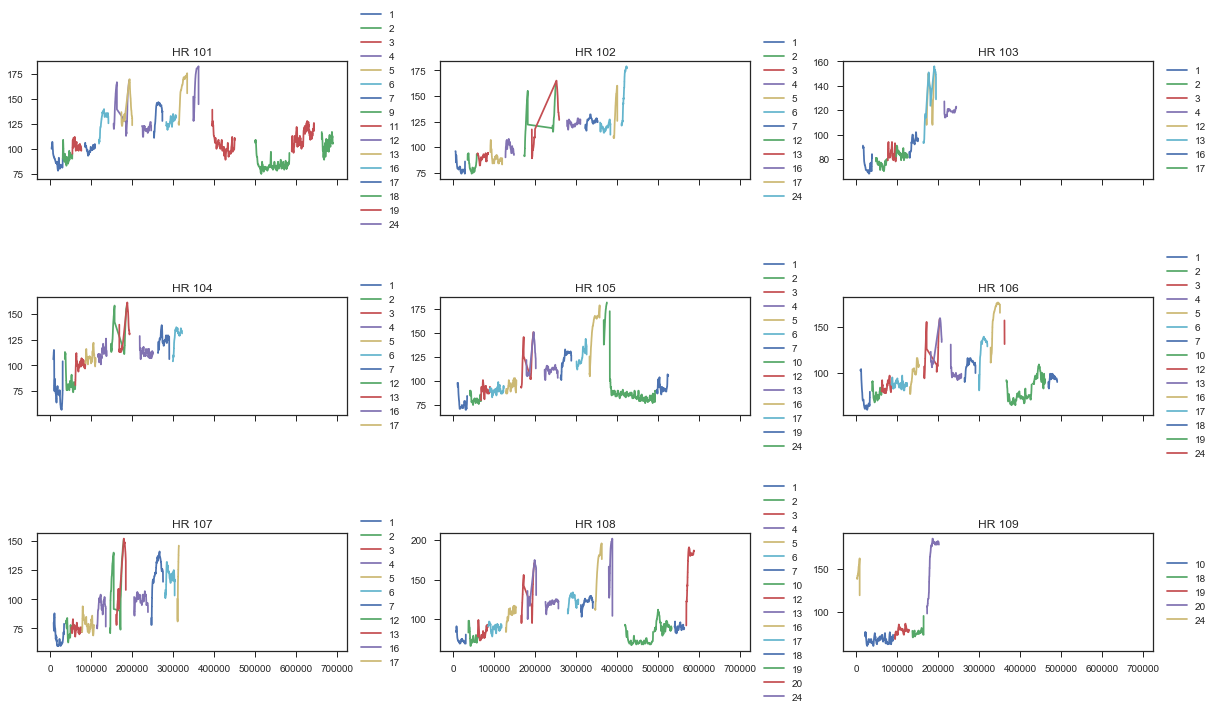

In [55]:
#Plot a heart rate per subject for all done activities.

fig, axes = plt.subplots(nrows = 3, ncols = 3, sharex = True, figsize=(20, 10))

dfp_101.groupby(['ActivityID'])['Heart_rate_bmp'].plot(ax = axes[0, 0]); axes[0, 0].set_title('HR 101'); axes[0,0].legend(loc = 'right', bbox_to_anchor = (1.2, 0.5))

dfp_102.groupby(['ActivityID'])['Heart_rate_bmp'].plot(ax = axes[0, 1]); axes[0, 1].set_title('HR 102'); axes[0,1].legend(loc = 'right', bbox_to_anchor = (1.2, 0.5))

dfp_103.groupby(['ActivityID'])['Heart_rate_bmp'].plot(ax = axes[0, 2]); axes[0, 2].set_title('HR 103'); axes[0,2].legend(loc = 'right', bbox_to_anchor = (1.2, 0.5))

dfp_104.groupby(['ActivityID'])['Heart_rate_bmp'].plot(ax = axes[1, 0]); axes[1, 0].set_title('HR 104'); axes[1,0].legend(loc = 'right', bbox_to_anchor = (1.2, 0.5))

dfp_105.groupby(['ActivityID'])['Heart_rate_bmp'].plot(ax = axes[1, 1]); axes[1, 1].set_title('HR 105'); axes[1,1].legend(loc = 'right', bbox_to_anchor = (1.2, 0.5))

dfp_106.groupby(['ActivityID'])['Heart_rate_bmp'].plot(ax = axes[1, 2]); axes[1, 2].set_title('HR 106'); axes[1,2].legend(loc = 'right', bbox_to_anchor = (1.2, 0.5))

dfp_107.groupby(['ActivityID'])['Heart_rate_bmp'].plot(ax = axes[2, 0]); axes[2, 0].set_title('HR 107'); axes[2,0].legend(loc = 'right', bbox_to_anchor = (1.2, 0.5))

dfp_108.groupby(['ActivityID'])['Heart_rate_bmp'].plot(ax = axes[2, 1]); axes[2, 1].set_title('HR 108'); axes[2,1].legend(loc = 'right', bbox_to_anchor = (1.2, 0.5))

dfp_109.groupby(['ActivityID'])['Heart_rate_bmp'].plot(ax = axes[2, 2]); axes[2, 2].set_title('HR 109'); axes[2,2].legend(loc = 'right', bbox_to_anchor = (1.2, 0.5))

plt.gca()
plt.subplots_adjust(top = 0.9, bottom = 0.08, right = 0.9, hspace = 1.0, wspace = 0.3)
plt.show()


All Protocol activities are presented in the first part of the graphs, after them optional activities. 

The data is fixed in order subjects were doing activities:
lying-1, sitting-2, standing-3, ironing-17, vacuum cleaning-16, ascending stairs-12, descending stairs-13, repeat ascending stairs-12, repeat descending stairs-13, walking-4, Nordic walking-7, cycling-12, running-13, rope jumping-24, optional: car driving - 11, watching TV-9, computer work-10, house cleaning-19, folding laundry-18, playing soccer-20.

It is clear to see that for all subject who did activities 1-3 and 17 (lying, sitting, standing, ironing respectively) heart rate in a range 60-110, when subjects started vacuum cleaning (16) their heart rate increased a little for all subjects, whereas the male #101  had a heart rate over 140bpm. Besides, it could be the personal reaction, thus, data does not require correction.

There are spikes for all subject for activities 12,13 (ascending and descending stairs) because they did activities two times, each time with a duration 1 minute. And it can be observed a high increase for 5, 20, 24 (running, playing soccer, rope jumping).

Subject #105 had a problem at activity 10 (computer work), as there is a too high level of heart rate for a short time after starting an activity. I consider this is as a result of previous activity - rope jumping. This data should be checked and corrected.



Check the activity 10 due to reason mentioned above:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001630AC6CC88>]],
      dtype=object)

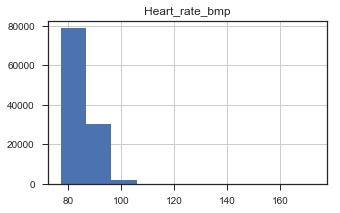

In [56]:

mpl.rc("figure", figsize=(5, 3))
dfp_temp = dfp_105[dfp_105['ActivityID']==10]
dfp_temp[['Heart_rate_bmp']].hist()

Text(0.5,1,'Data distribution for subject 105, activity 10')

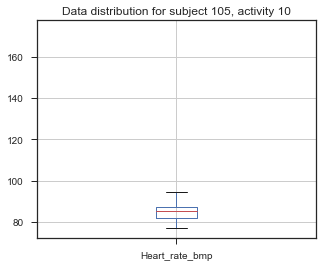

In [58]:
mpl.rc("figure", figsize=(5, 4))
dfp_temp[['Heart_rate_bmp']].boxplot()
plt.title('Data distribution for subject 105, activity 10')

Look at statistics for activity 10:

In [59]:
dfp[dfp['ActivityID']==10][['Heart_rate_bmp']].describe()

,Heart_rate_bmp
count,309602.000000
mean,75.732109
std,8.322944
min,60.000000
25%,69.000000
50%,73.000000
75%,83.000000
max,172.888889


Find how many records with similar high heart rate.

In [60]:
dfp_105[(dfp_105["Heart_rate_bmp"]>100) & (dfp_105['ActivityID']==10)][['Heart_rate_bmp']].count()

Heart_rate_bmp    630
dtype: int64

Plot the graph to see the range of  heart_rate magnitude which is make sense to correct.

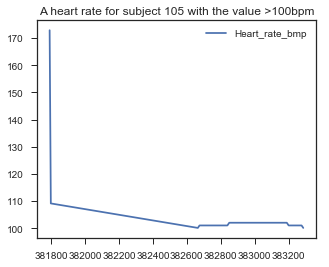

In [61]:
dfp_105[(dfp_105["Heart_rate_bmp"]>100) & (dfp_105['ActivityID']==10)][['Heart_rate_bmp']].plot( title='A heart rate for subject 105 with the value >100bpm')

In [62]:
#It make sense to replace records in a range (110, max()) according the graph. Extract that data to see amount of rows.

df_temp_105 = dfp_105.loc[(dfp_105["Heart_rate_bmp"]<=dfp_105["Heart_rate_bmp"].max()) & (dfp_105["Heart_rate_bmp"]>110) & (dfp_105['ActivityID']==10), 'Heart_rate_bmp']
l = [df_temp_105.index]
l


[Int64Index([381792, 381793, 381794, 381795, 381796, 381797, 381798], dtype='int64')]

In [63]:
#Replacing 7 values with NaN and fill with a values using fillna(), method 'bfill'.

for i in range(len(l[0])):
  dfp_105.at[l[0][i], 'Heart_rate_bmp'] = np.NaN

In [64]:
dfp_105.fillna(method = 'bfill').head(2)

,Timestamp,ActivityID,Heart_rate_bmp,IMU_hand_temperature,IMU_hand_3D_acc_16_1,IMU_hand_3D_acc_16_2,IMU_hand_3D_acc_16_3,IMU_hand_3D_gs_1,IMU_hand_3D_gs_2,IMU_hand_3D_gs_3,...,IMU_ankle_3D_acc_16_1,IMU_ankle_3D_acc_16_2,IMU_ankle_3D_acc_16_3,IMU_ankle_3D_gs_1,IMU_ankle_3D_gs_2,IMU_ankle_3D_gs_3,IMU_ankle_3D_mn_1,IMU_ankle_3D_mn_2,IMU_ankle_3D_mn_3,NS
9880,104.50,1,98.0,34.6875,-9.00214,3.10187,2.31949,-0.146257,-0.059699,-0.051229,...,9.71683,0.336921,-2.38836,0.014686,0.019172,0.017190,-38.2428,-49.3220,12.2520,105
9881,104.51,1,98.0,34.6875,-8.77219,3.17667,2.39966,-0.130033,-0.024626,-0.093336,...,9.64108,0.375685,-2.42796,-0.004786,-0.003672,0.019288,-37.9971,-48.9484,12.1106,105


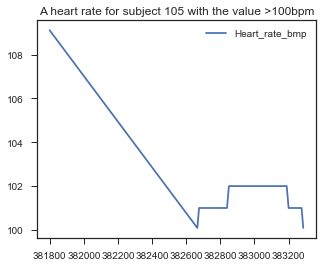

In [65]:
dfp_105[(dfp_105["Heart_rate_bmp"]>100) & (dfp_105['ActivityID']==10)][['Heart_rate_bmp']].plot( title='A heart rate for subject 105 with the value >100bpm')

Now heart rate for 105 subject (activity 10- computer work) is much better and removing that non-distinctive value will help to classify this activity more precise.

Analyse a heart rate for each subject per activity:

In [67]:
df_HR_S = pd.concat([dfp.groupby(['NS'])['Heart_rate_bmp'].min(), 
                     dfp.groupby(['NS'])['Heart_rate_bmp'].max()], axis = 1)
df_HR_S.columns = ['Min HR', 'Max HR']

df_HR_S

,Min HR,Max HR
NS,,
101,75.0,183.0
102,74.0,179.0
103,68.0,156.0
104,57.0,161.0
105,70.0,182.0
106,60.0,176.0
107,60.0,152.0
108,66.0,202.0
109,60.0,185.0


From the total values of heart rate we can find that some subject had heart rate higher then his HRmax due to SubjectInformation data. So, from the bar plot above it can be seen that #108 had HRmax = 202, whereas his provided HRmax = 188, therefore the hypotethic hardware will give a warning for the subject while doing rope jumping, because it could be dangerous for the person's health.

## Anylize data from IMU

### Temperature

Explore if there any dirty data for temperature parameter. It is possible to have not valid data due to sensors fixation. Correct data where relevant.

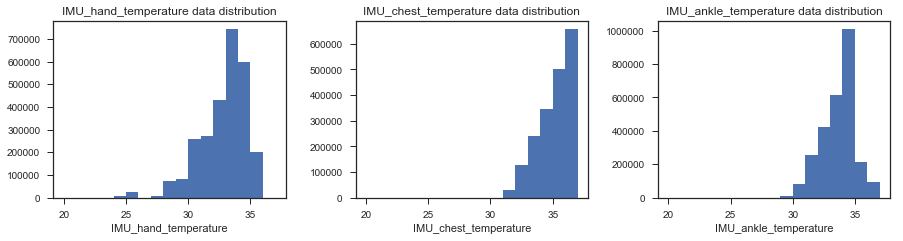

In [70]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, sharex = False, figsize=(15, 3))

axes[0].hist(dfp.IMU_hand_temperature, bins=np.arange(20,38)); axes[ 0].set_title('IMU_hand_temperature data distribution'); axes[0].set_xlabel('IMU_hand_temperature')
axes[1].hist(dfp.IMU_chest_temperature, bins=np.arange(20,38)); axes[1].set_title('IMU_chest_temperature data distribution'); axes[1].set_xlabel('IMU_chest_temperature')
axes[2].hist(dfp.IMU_ankle_temperature, bins=np.arange(20,38)); axes[2].set_title('IMU_ankle_temperature data distribution'); axes[2].set_xlabel('IMU_ankle_temperature')

plt.gca()
plt.subplots_adjust(top = 0.9, bottom = 0.08, hspace = 0.3, wspace = 0.3)
plt.show()



It can be observed a temperature around 25 degrees. Explore which subjects got it and during which activities (as obviously it is a sensor malfunction).


In [72]:
dfp_temp_err = dfp[dfp['IMU_hand_temperature']<=27.5]
dfp_temp_err.groupby(['ActivityID','NS'])[ 'IMU_hand_temperature'].describe()

,,count,mean,std,min,25%,50%,75%,max
ActivityID,NS,,,,,,,,
5,104,1.0,27.500000,NaN,27.500,27.5,27.5000,27.500,27.5000
20,109,28379.0,25.065685,0.097197,24.875,25.0,25.0625,25.125,25.1875
24,109,6386.0,25.051274,0.071742,24.875,25.0,25.0625,25.125,25.1875


For activity 20 (playing soccer) and 24 (rope jumping) there is a low level temperature during all activity for subject 109 only, hence, it could be the reason of bad fixed sensor, cold weather or similar issues. 

In [74]:
#Delete one record for the subject 104, activity 5 (running), it is obviously could be considered as a dirty data, 
#because there is nothing to analyse having one measurement only.


dfp[(dfp['NS']==104) & (dfp['ActivityID']==5)]

,Timestamp,ActivityID,Heart_rate_bmp,IMU_hand_temperature,IMU_hand_3D_acc_16_1,IMU_hand_3D_acc_16_2,IMU_hand_3D_acc_16_3,IMU_hand_3D_gs_1,IMU_hand_3D_gs_2,IMU_hand_3D_gs_3,...,IMU_ankle_3D_acc_16_2,IMU_ankle_3D_acc_16_3,IMU_ankle_3D_gs_1,IMU_ankle_3D_gs_2,IMU_ankle_3D_gs_3,IMU_ankle_3D_mn_1,IMU_ankle_3D_mn_2,IMU_ankle_3D_mn_3,NS,Duration
1126982,3301.46,5,131.0,27.5,-4.61858,6.44599,-5.9394,0.008226,0.008636,0.02235,...,0.869277,-2.431,-0.015812,-0.000262,-0.00119,-49.8489,5.81694,2.78633,104,3301.46


In [75]:
dfp.drop(dfp[(dfp['NS']==104) & (dfp['ActivityID']==5)].index, inplace = True)
len(dfp[(dfp['NS']==104) & (dfp['ActivityID']==5)])

0

In [0]:
#Extract statistics for 20, 24 activities  for all subjects

dfp[(dfp['ActivityID']==20) | (dfp['ActivityID']==24)].groupby(['ActivityID'])[ 'IMU_hand_temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
ActivityID,,,,,,,,
20,46915.0,27.270159,2.779595,24.875,25.0625,25.1875,30.7500,30.8125
24,49360.0,29.720052,2.490725,24.875,28.4375,30.1875,30.8125,33.8750


Q3 (75%) is over 30 degrees, hence, it was right conclusion that 109 subject had a problem with a sensor.

Plot all temperature distributions to see relations and behavior within experiment.

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


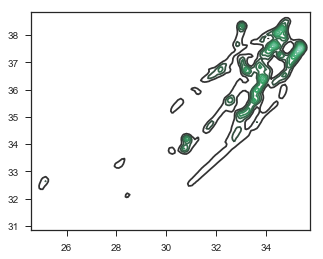

In [77]:
#Warning! Plotting the graph take too long time!!!!
#Sorry that's why labels and title are not applied.

sns.set(style="ticks", color_codes=True)

df_temp = dfp[['IMU_hand_temperature', 'IMU_chest_temperature', 'IMU_ankle_temperature']]
sns.kdeplot(df_temp, dfp['Timestamp']);

This plot of 3 temperature measurements is built with respect to Timestamp. A data accumulation (green lines) shows constant temperature during many activities (or with a little changes). Also possible to see that temperature on sensors was not the same during one moment, while one fixed 34 degrees the other measured less that 31. During most activities temperature between  sensors varied in a range 2-4 degrees, while one sensor fixed 38 degrees, another had temperature 36 . 

In general a temperature on sensors during all activities was from 34 up to 38,5 degrees but not equal. 

Some outliners with a low temperature such as 24-28,5 degrees are result of possible low ambient temperature, sensor problems (not calibrated properly or sensor not fixed well on the body, faulty hardware or similar issues).

### Explore if temperature is a good feature for the predictive model

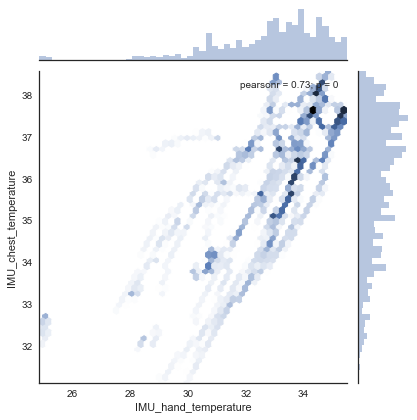

In [83]:

df_temp = dfp[['IMU_hand_temperature', 'IMU_chest_temperature']]
with sns.axes_style('white'):
    g = sns.jointplot("IMU_hand_temperature", "IMU_chest_temperature", df_temp, kind='hex')
   

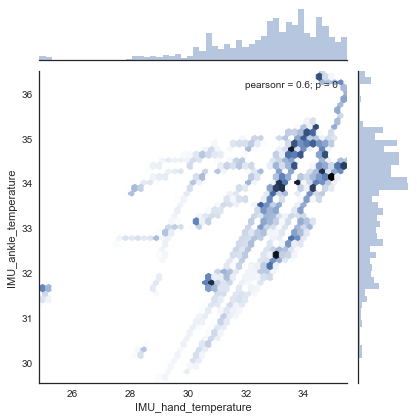

In [84]:
df_temp = dfp[['IMU_hand_temperature', 'IMU_ankle_temperature']]
with sns.axes_style('white'):
    g = sns.jointplot("IMU_hand_temperature", "IMU_ankle_temperature", df_temp, kind='hex')
   

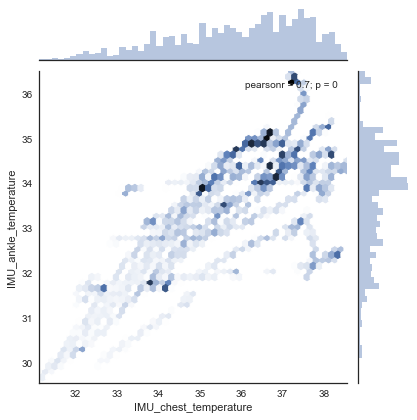

In [85]:
df_temp = dfp[['IMU_chest_temperature', 'IMU_ankle_temperature']]
with sns.axes_style('white'):
    g = sns.jointplot("IMU_chest_temperature", "IMU_ankle_temperature", df_temp, kind='hex')
   

All temperature parameters are well correlated, hence we can use one of the temperature property for the future predictive model.

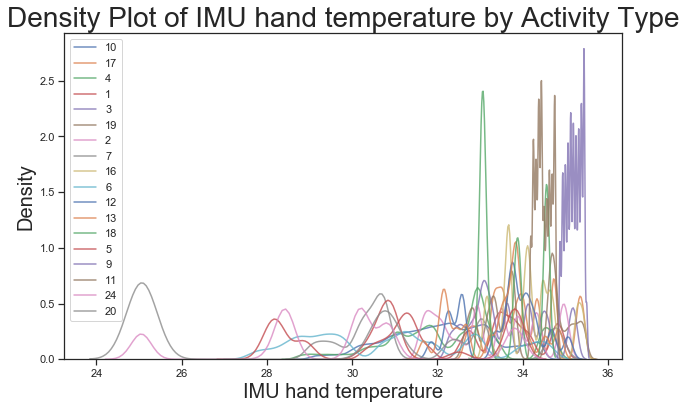

In [67]:
#density distributions of hand temperature by activities.

density_plot(dfp, 'IMU_hand_temperature', 'IMU hand temperature')

Density plot shows that hand temperature has considerable impact on activities, consiquently, this attribute is good to build a model.

### Pairwise relasionship between IMU parameters

Look at correlation between IMU_hand_temperature and IMU_chest_temperature, IMU_ankle_temperature. It can give an idea which parameter will be better to use for the model and detect range of average values for each sensor, so the device will give warnings to the user if the temperature outside normal values.

In [70]:
#check correlation
dfp[['IMU_hand_temperature', 'IMU_chest_temperature', 'IMU_ankle_temperature']].corr(method = 'pearson')

,IMU_hand_temperature,IMU_chest_temperature,IMU_ankle_temperature
IMU_hand_temperature,1.000000,0.729381,0.599182
IMU_chest_temperature,0.729381,1.000000,0.699124
IMU_ankle_temperature,0.599182,0.699124,1.000000


Easy to see these parameters are correlated good enough, hence, one parameter can use as a feature for creating model.

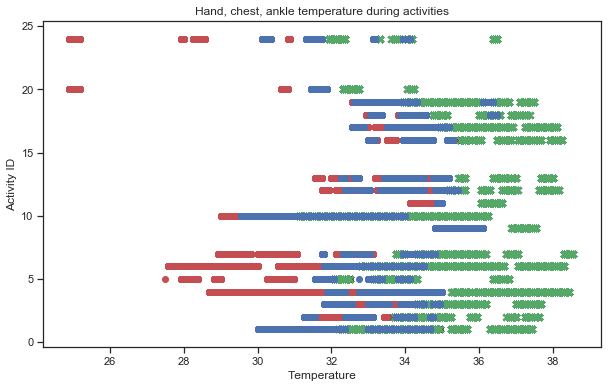

In [69]:
plt.scatter(dfp['IMU_hand_temperature'], dfp['ActivityID'], color="r", marker = 'o')
plt.scatter(dfp['IMU_chest_temperature'], dfp['ActivityID'], color="g", marker = 'x')
plt.scatter(dfp['IMU_ankle_temperature'], dfp['ActivityID'], color = 'b', marker = 'o')
plt.title('Hand, chest, ankle temperature during activities')
plt.xlabel('Temperature')
plt.ylabel('Activity ID')
#plt.legend(True) 
plt.show()

Legend: 

*   Hand temperature - red, 
*   Chest temperature - green,
*   Ankle temperature - blue.

Highest temperature during all activities had chest, for ankle was fixed temperature between 30 and 36 degrees, the lowest temperature was measured by sensor on a hand. There are some outliers for activities  20 and 24, probably sensor defect or similar issues. 

During activities 1-3 we can say that subjects moved hand and ankle similar way, because temperature for them coincides.

For activities 4-7 ankle temperature varied, so obviously those  activities a subject moved legs a lot (it was walking, running, cycling, Nordic walking) and sensor was not fixed well.

At activity 9 subject did not moved as almost constant temperature can be observed.

Activity 10 required hand and ankle movement, temperature varied, but chest was not moving almost (it was computer work

Activities 12, 13 looks very similar, temperature tendency from all three sensors have very close measurements (it was ascending, descending stairs)


For activities 16-19 temperature from all three sensors were in a short range (maybe a bit different from subject to subject due to individual characteristics of  body), hence, these activities must be very similar (it was vacuum cleaning, iironing, folding laundry, house cleaning).

During activities 20 and 24 subjects moved hand, chest and ankle, as we can see different temperature from all sensors.
Body temperature is similar among all range of activities.

This temperature information is useful for providing users recomendations of the boundaries of possible temperature changes during activities, in case of some issues with health.

As a feature for the model I choose IMU hand temperature.




## Transform data from accelerators

In [41]:
#Calculate 3D vector for each accelerator measurements 
#add three new column 'Acc_hand', 'Acc_chest', 'Acc_ankle' respectively for each sensor:

dfp['Acc_hand'] = np.sqrt(dfp['IMU_hand_3D_acc_16_1']**2+dfp['IMU_hand_3D_acc_16_2']**2+dfp['IMU_hand_3D_acc_16_3']**2)
dfp['Acc_chest'] = np.sqrt(dfp['IMU_chest_3D_acc_16_1']**2+dfp['IMU_chest_3D_acc_16_2']**2+dfp['IMU_chest_3D_acc_16_3']**2)
dfp['Acc_ankle'] = np.sqrt(dfp['IMU_ankle_3D_acc_16_1']**2+dfp['IMU_ankle_3D_acc_16_2']**2+dfp['IMU_ankle_3D_acc_16_3']**2)

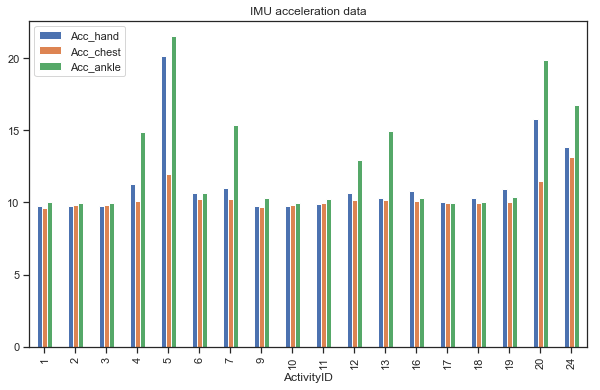

In [42]:
dfp_temp = dfp[['ActivityID','Acc_hand', 'Acc_chest', 'Acc_ankle']]
dfp_temp.groupby('ActivityID').agg('mean').plot(kind='bar', figsize=(10,6), title = 'IMU acceleration data')

There are similar value for many activities can be observed:
1,2,3,6,9,10,16,17,18,19 belong to one group and the rest we can split into two subgroups, where meaningful ankle movement was observed during activities: 4,7,12,13, and during the orhers activities 5,20,24 was detected high movement by ankle, hand and a little chest.

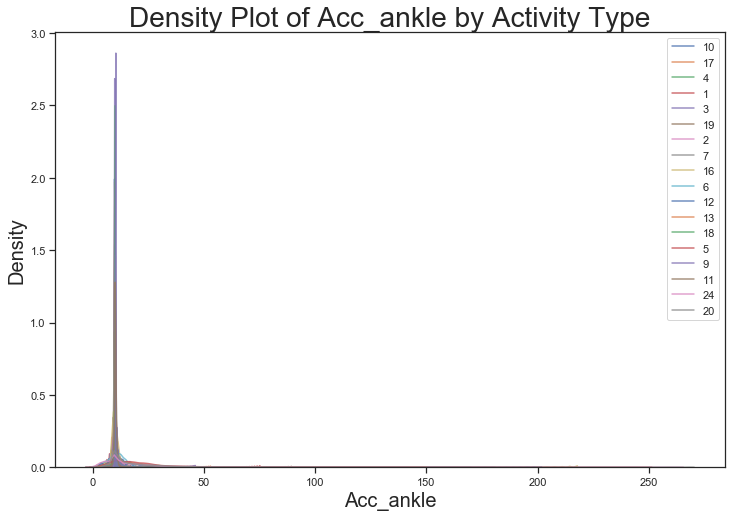

In [46]:
density_plot(dfp, 'Acc_ankle', 'Acc_ankle')

The density plot shows data distribution lay over each other in some part, hence this is not the best attribute for the model.

### Transform magnitometor data

In [48]:
dfp['M_hand'] = np.sqrt(dfp['IMU_hand_3D_mn_1']**2+dfp['IMU_hand_3D_mn_2']**2+dfp['IMU_hand_3D_mn_3']**2)
dfp['M_chest'] = np.sqrt(dfp['IMU_chest_3D_mn_1']**2+dfp['IMU_chest_3D_mn_2']**2+dfp['IMU_chest_3D_mn_3']**2)
dfp['M_ankle'] = np.sqrt(dfp['IMU_ankle_3D_mn_1']**2+dfp['IMU_ankle_3D_mn_2']**2+dfp['IMU_ankle_3D_mn_3']**2)

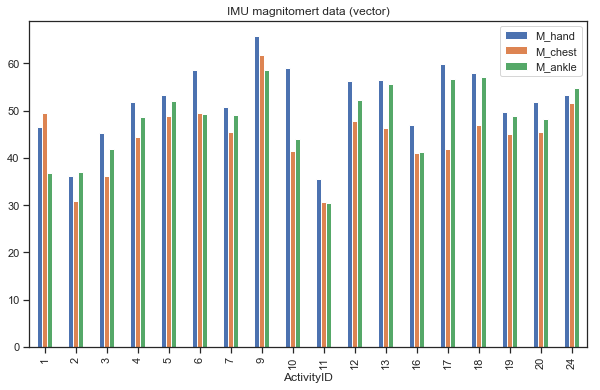

In [49]:
dfp_temp = dfp[['ActivityID','M_hand','M_chest','M_ankle']]
dfp_temp.groupby('ActivityID').agg('mean').plot(kind='bar', figsize=(10,6), title = 'IMU magnitomert data (vector)')

Magnitometr data is vary enough among activities.

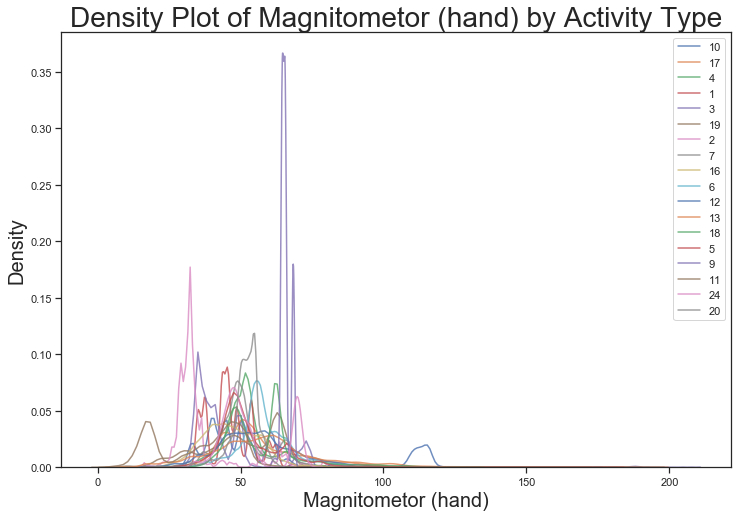

In [50]:
density_plot(dfp, 'M_hand', 'Magnitometor (hand)')

In [51]:
dfp_temp.corr()

,ActivityID,M_hand,M_chest,M_ankle
ActivityID,1.000000,0.169786,0.073757,0.228255
M_hand,0.169786,1.000000,0.704716,0.562420
M_chest,0.073757,0.704716,1.000000,0.650246
M_ankle,0.228255,0.562420,0.650246,1.000000


Variables (magnitometr vectors) are well correlated, look at the distribution.

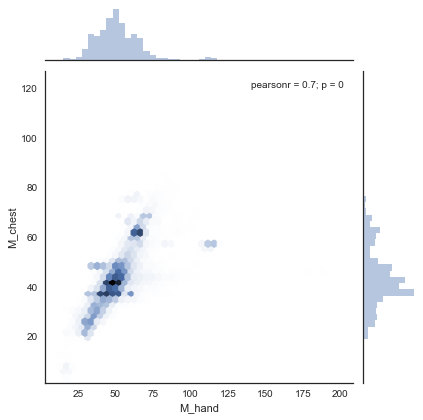

In [115]:
df_temp = dfp[['M_hand', 'M_chest']]
with sns.axes_style('white'):
    g = sns.jointplot('M_hand', 'M_chest', df_temp, kind='hex')
   

Distributions have high correlation coefficient 0.71. A little portion of outliers are observed in a range (60,110), could be a result of problems with sensor.

As all three characteristics (hand, ankle, chest) from magnitometor are well correlated, so I choose magnitometor data for hand as a feature to develop model.

I can choose one of those parameters because few highly correlated features create collinearity. But multicollinearity is not good for feature selection for predictive model. It will make the estimate highly in-stable. This instability will increase the variance of estimates. It means that if there is a small change in X, produces large changes in estimate.



# Hypothesis testing

Consider a hypothesis that a mean heart rate (HR) folding laundry (activity 18) is equal mean HR house cleaning (activity 19), apply to subject 101.


1)State null hypothesis and alternative hypothesis.

The Null Hypothesis H0:  mean HR (folding laundry) = mean HR (house cleaning)

The Alternative hypothesis H1:  mean HR (folding laundry) != mean HR (house cleaning)

Hence, we have an independent two sample t-test as there are two samples of data independently drawn. This test will be a two-tailed test, because we are trying to capture a general significance difference. Actually this is about 'tails'' of the Normal Distribution plot.

2)Set the significance level of the statistical test as 0.05. If the p-value is less than what is tested at (0.05), one can reject the null hypothesis.

3)Choose the test to apply.

First, check if data has normal distribution.
Second, datasets must be independent of each other.
Third, check the variance of samples, whether distributions have a different standard deviation (means a difference variance).
Therefore, if there is no differ in variances, student t-test must be applied, otherwise Welch's test is a right one.

If the distributions in data are not normal, then we should apply log to see if distribution changed to Normal. Otherwise,  Mann-Whitney test (Wilcoxon) must be applied. That test is based on rank in data.

4)Find test statistic.

5)Draw a conclusion.

In [71]:
#I will not devide data for development and test parts as it will be taken a raw data from file for subject 101, 
#optional activities.

sample1 = dfo_101[dfo_101['ActivityID']==18]['Heart_rate_bmp']
sample1 = sample1.dropna()[:2400]
sample2 = dfo_101[dfo_101['ActivityID']==19]['Heart_rate_bmp']
sample2 = sample2.dropna()[:2400]
sample1.name, sample2.name = 'mean Sample1', 'mean Sample2'

In [72]:
#function to plot two histogram in one picture
def two_histogram(x, y):
  x.hist(alpha = 0.5, weights = [1./len(x)]*len(x))
  y.hist(alpha = 0.5, weights = [1./len(y)]*len(y))
  plt.axvline(x.mean(), color = 'red', alpha = 0.8, linestyle = 'dashed')
  plt.axvline(y.mean(), color = 'blue', alpha = 0.8, linestyle = 'dashed')
  plt.legend([x.name, y.name])
  plt.title('Histograms of two distributions')

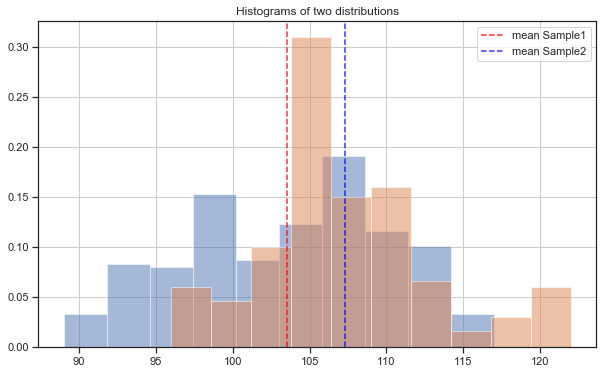

In [73]:
#Check  samples distribution for normality.

two_histogram(sample1, sample2)

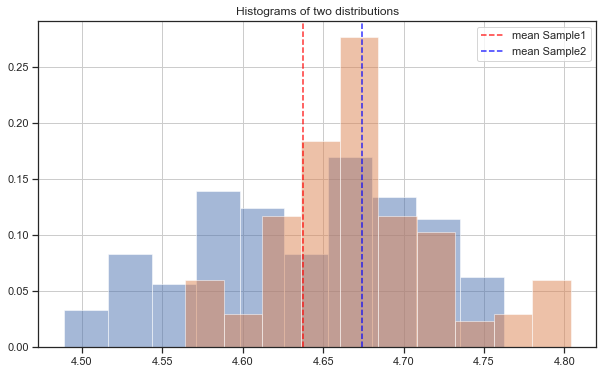

In [74]:
#It can be observed that if green histogram (Sample2) we could somehow call as Normal, 
#the blue histogram is obviously has not normal distribution.

#take a log and plot again.

two_histogram(sample1.apply(np.log), sample2.apply(np.log))

Applying log to distribution did not change shape to Normal, then for this hypothesis testing Mann-Witney test must apply.

In [75]:
from scipy.stats import mannwhitneyu

# two-sample  Mann Whitney (wilcoxon test)
u, p_value = mannwhitneyu(sample1, sample2)
print( "Two-sample Mann-Witney-test :: p_value = ", p_value)

Two-sample Mann-Witney-test :: p_value =  6.274646403753814e-65


P-value tends to zero, hence <0.05 and we can say that the significance level is below the cut-off value we have set up (as 0.05).
Conclusion: Null hypothesis is rejected, the alternative hypothesis H1 is accepted.

Consiquently, we reject the hypothesis that  mean  heart rate for the activity 'folding laundry' is equal mean heart rate for the activity "house cleaning". There is enough emperical evidence to reject Null Hypothesis. And we accept hypothesis H1 that that they are not equal.

In [121]:
#For the extra test, show up real mean values for tested activities.

print('Mean heart rate for activity 18 is {}, for 19 is {}'.format(dfo_101[dfo_101['ActivityID']==18]['Heart_rate_bmp'].mean(), dfo_101[dfo_101['ActivityID']==19]['Heart_rate_bmp'].mean()) )

Mean heart rate for activity 18 is 103.60895883777239, for 19 is 112.53205257836198


# Device development

I apply PCA to find out the approximate number of dimensions which fit the data in a better way. After, I do clustering to develop an idea about providing recommendations about next activity for the user.
Thereafter, testing models to find a better classifier to predict activity using important features explored above.

# PCA

This is a pre-processing step for machine learning algorithms like regression and clustering (a dimensionality reduction technique). Using PCA I will detect an approximation about optimal number of dimensions for a predictive model.

In [ ]:
#due to limited memory, portion of data will be chosen for each activity

dfp.groupby('ActivityID')['Heart_rate_bmp', 'Acc_hand', 'Acc_chest', 'Acc_ankle','IMU_hand_temperature', 'IMU_chest_temperature', 'IMU_ankle_temperature',  'G_hand', 'G_chest', 'G_ankle',
                                 'M_hand', 'M_chest', 'M_ankle', 'ActivityID'].count().min()

In [398]:
#define testing and training data

data = dfp.groupby('ActivityID')['Heart_rate_bmp', 'Acc_hand', 'Acc_chest', 'Acc_ankle', 'IMU_hand_temperature', 'IMU_chest_temperature', 'IMU_ankle_temperature',  'G_hand', 'G_chest', 'G_ankle',
                                 'M_hand', 'M_chest', 'M_ankle', 'ActivityID'].head(45835)
X = data.drop('ActivityID', axis = 1)  
y = data['ActivityID']  

#split in a proportion 70/30 train/test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

#standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [399]:
#function for PCA
def pca_tr(X_train, X_test, n_comp):
  pca = PCA(n_components = n_comp)  
  X_train = pca.fit_transform(X_train)  #To get the reduced dimensionality features, apply the transform method to a data
  X_test = pca.transform(X_test) 
  explained_variance = pca.explained_variance_ratio_  
  
  return explained_variance, X_train, X_test

#RainForestClassifier
def RFC(X_train, X_test, y_train, y_test):
  classifier = RandomForestClassifier(max_depth=2, random_state=42)  
  classifier.fit(X_train, y_train)
  # Predicting the Test set results
  y_pred = classifier.predict(X_test)  
  cm = confusion_matrix(y_test, y_pred)  
  #print(cm)  
  return accuracy_score(y_test, y_pred)

I use RainForestClassifier to observe the differences while choosing different number of components.


In [400]:
n_comp=7
explained_variance, X_train, X_test = pca_tr( X_train, X_test, n_comp)
print ('Variance for {} Principal Components: {}'.format(n_comp, explained_variance))

Variance for 7 Principal Components: [0.29786933 0.19405963 0.15985459 0.09694973 0.06577264 0.042094
 0.03279755]


In [401]:
RFC(X_train, X_test, y_train, y_test)

0.37898015829727405

In [402]:
n_comp=5
explained_variance, X_train, X_test = pca_tr(X_train, X_test, n_comp)
print ('Variance for {} Principal Components: {}'.format(n_comp, explained_variance))

Variance for 5 Principal Components: [0.33491137 0.21819224 0.17973358 0.10900607 0.07395191]


In [403]:
RFC(X_train, X_test, y_train, y_test)

0.3701804782856381

In [404]:
n_comp=3
explained_variance, X_train, X_test = pca_tr(X_train, X_test, n_comp)
print ('Variance for {} Principal Components: {}'.format(n_comp, explained_variance))

Variance for 3 Principal Components: [0.36570554 0.23825441 0.19625958]


In [405]:
RFC(X_train, X_test, y_train, y_test)

0.3791377283250306

Therefore, using PCA it is possible to reduce dataset dimensionality and increase accuracy. The experiment shows that three components are better for this data than their higher number.

# Clustering

In this part, I will do clustering activities by the evidence if a subject did it or no. Thus, it is possible to detect clusters of people who did the same activities, hence we could know their preferences. This will be used for the device which will be able to give recommendation users what kind of activities to do instead of they performed. For example, a user chooses one activity, after, the application will suggest doing another activity from the same cluster, hence, it will diversify a range of activities for users and make them happier.

In [256]:
#Create a frequency table with a values 1,0 where 1 - a subject did activity,  0 - subject did not do activity. 
#Suppose that one subject is one observation.

from sklearn.cluster import KMeans

df_freq = dfp.groupby([ 'NS','ActivityID']).agg({'ActivityID': lambda x: 1 if x.count()>0 else 0})
df_freq
df_freq1 = df_freq.unstack()
df_freq1.fillna(0, inplace=True)
df_freq1

ActivityID                                                         \
ActivityID         1    2    3    4    5    6    7    9    10   11   12   13   
NS                                                                             
101               1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
102               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
103               1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
104               1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
105               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
106               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
107               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
108               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
109               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

                                          
ActivityID   16   17   18   19   20   24  
NS                                        
101         1.0  1.0  1.0  1.0  0.0  1.0  
102         1.0  1.0  0.0  0.0  0.0  1.0  
103         1.0  1.0  0.0  0.0  0.0  0.0  
104         1.0  1.0  0.0  0.0  0.0  0.0  
105         1.0  1.0  0.0  1.0  0.0  1.0  
106         1.0  1.0  1.0  1.0  0.0  1.0  
107         1.0  1.0  0.0  0.0  0.0  0.0  
108         1.0  1.0  1.0  1.0  1.0  1.0  
109         0.0  0.0  1.0  1.0  1.0  1.0

In [258]:
#Using SciPy,  it will be calculated a distance between clusters with the Ward algorithm and distance metric 'Euclidean'.

link = linkage(df_freq1, 'ward', 'euclidean')

link[:5]

array([[ 4.        ,  5.        ,  1.        ,  2.        ],
       [ 1.        ,  6.        ,  1.        ,  2.        ],
       [ 7.        ,  9.        ,  1.29099445,  3.        ],
       [ 3.        , 10.        ,  1.29099445,  3.        ],
       [ 2.        , 12.        ,  1.95789002,  4.        ]])

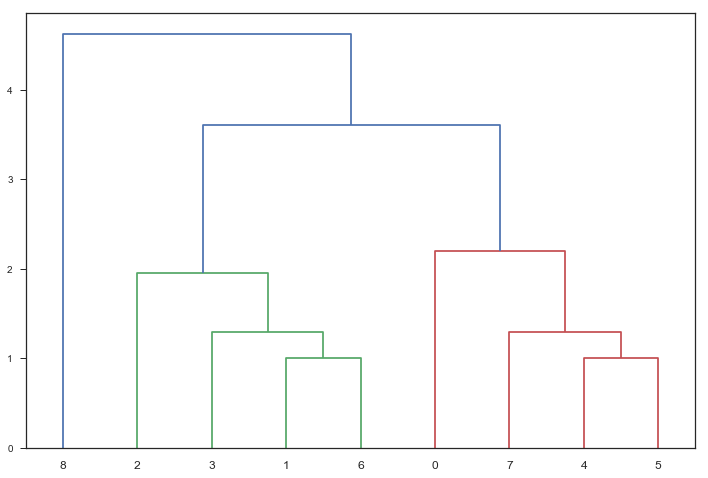

In [259]:
#Build simple dendrogram to see offered number of clusters.
dn = dendrogram(link)

From dendrogram we can see three clusters. 

In [261]:
#add column cluster and save its number of cluster chosen for every activity
df_freq1['cluster'] = fcluster(link, 3, criterion = 'distance')
df_freq1.groupby('cluster').mean()

ActivityID                                                         \
ActivityID         1    2    3    4    5     6     7     9     10    11   12   
cluster                                                                        
1                 1.0  1.0  1.0  1.0  0.5  0.75  0.75  0.00  0.00  0.00  1.0   
2                 1.0  1.0  1.0  1.0  1.0  1.00  1.00  0.25  0.75  0.25  1.0   
3                 0.0  0.0  0.0  0.0  0.0  0.00  0.00  0.00  1.00  0.00  0.0   

                                                  
ActivityID   13   16   17    18   19    20    24  
cluster                                           
1           1.0  1.0  1.0  0.00  0.0  0.00  0.25  
2           1.0  1.0  1.0  0.75  1.0  0.25  1.00  
3           0.0  0.0  0.0  1.00  1.0  1.00  1.00

In [262]:
df_freq1.groupby('cluster').size()

cluster
1    4
2    4
3    1
dtype: int64

Conclusion: all subject devided for 3 clusters, where two clusters contains for 4 subjects and only one subject belong to cluster 3.  

Apply K-Means method to detect number of clusters. It will be passed number_of_clusters equal three, according previous result.


In [263]:
#initialize model
model = KMeans(n_clusters = 3, random_state = 42)

#fitting the model
model.fit(df_freq1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [267]:
#result clusterisation
model.labels_

#coordinates of centers clusters
model.cluster_centers_

#prediction
new_items = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

model.predict(new_items)

#clusters per subject
df_freq1

ActivityID                                                         \
ActivityID          1    2    3    4    5    6    7    9   10   11   12   13   
NS                                                                             
101               1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
102               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
103               1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
104               1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
105               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
106               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
107               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
108               1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
109               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

                                         cluster  
ActivityID   16   17   18   19   20   24          
NS                                                
101         1.0  1.0  1.0  1.0  0.0  1.0       2  
102         1.0  1.0  0.0  0.0  0.0  1.0       1  
103         1.0  1.0  0.0  0.0  0.0  0.0       1  
104         1.0  1.0  0.0  0.0  0.0  0.0       1  
105         1.0  1.0  0.0  1.0  0.0  1.0       2  
106         1.0  1.0  1.0  1.0  0.0  1.0       2  
107         1.0  1.0  0.0  0.0  0.0  0.0       1  
108         1.0  1.0  1.0  1.0  1.0  1.0       2  
109         0.0  0.0  1.0  1.0  1.0  1.0       3

To find optimal number of clusters use Elbow method.

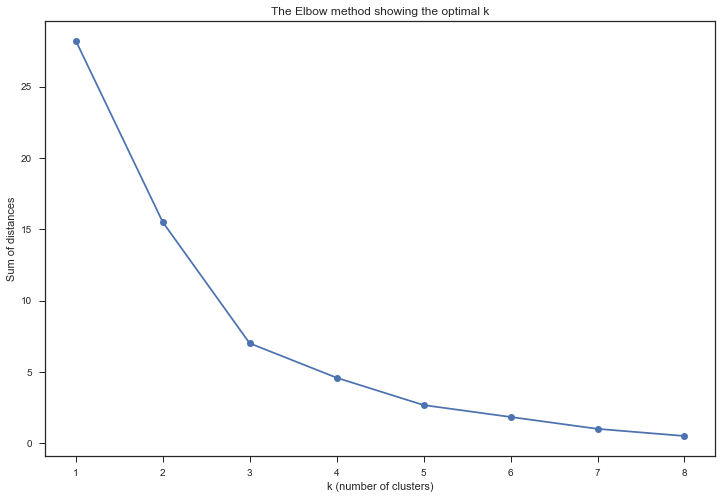

In [268]:
K = range(1, 9)
models = [KMeans(n_clusters = k, random_state = 42).fit(df_freq1) for k in  K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('k (number of clusters)')
plt.ylabel ('Sum of distances')
plt.title('The Elbow method showing the optimal k')
plt.show()

It can be seen from the graph that optimal number of clusters is three.

So I can advice, for example, for subject 105, who belongs to cluster 2, to do activity 18, due to curcumstances that subject 101 from the same cluster did that activity.

## K-means clustering activity by chosen parameters

In [269]:
#At the beginning we have to find out how many clusters our data should be devided.

#Due to high complexity some steps (as distance and linkage) and limited memory resources, 
#the amount of data for each activity was selected as 1000 records.

df_clustering = dfp.groupby('ActivityID')['Heart_rate_bmp', 'IMU_hand_temperature', 'Acc_hand', 'G_hand', 
                                         'M_ankle'].head(1000)
data_for_clust=df_clustering.values
data_for_clust[0]

array([1.00000000e+02, 3.03750000e+01, 1.02309516e+01, 3.94834157e-02,
       9.21961772e+01])

In [271]:
'''Preprocessing data. Before applying algorithm we have to do standartize the data attributes, 
   the way that every attribute has mean=0 and variance=1.'''

#standartize the data attributes
dataNorm = preprocessing.scale(data_for_clust)

In [272]:
# calculate euclidean distance
data_dist = pdist(dataNorm, 'euclidean')


In [273]:
#linkage data
data_linkage = linkage(data_dist, method='ward')


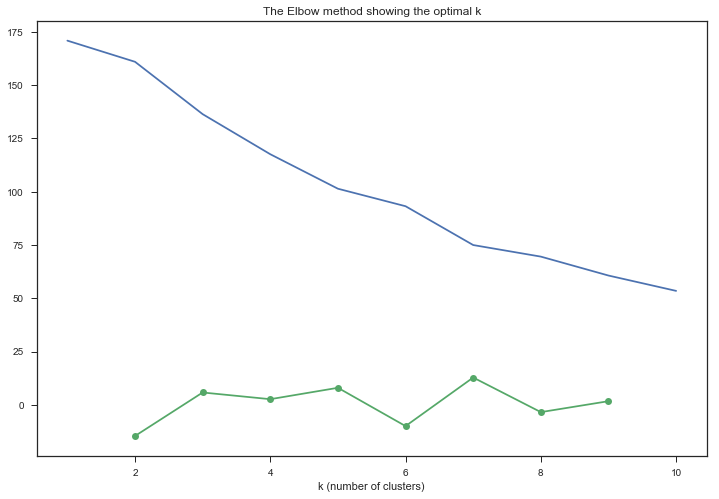

clusters: 7


In [274]:
#elbow method to define number of clusters
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev, marker='o')
plt.xlabel('k (number of clusters)')
plt.title('The Elbow method showing the optimal k')
plt.show()
k = acceleration_rev.argmax() +2
print("clusters:", k)



The optimal number is 7 clusters, by this method choose point with less distance between an elbow and a line.

In [275]:
#function to build a dendrogram
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

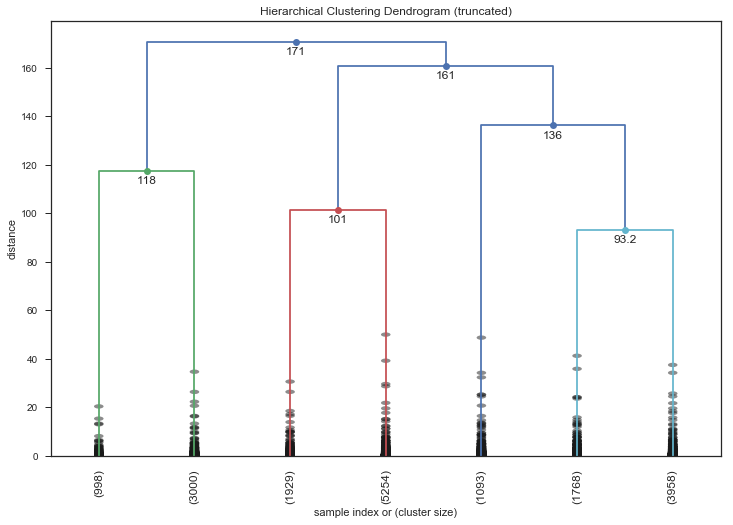

In [276]:
#define number of clusters
nCluster=7

fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nCluster, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

I explore which activities are in the same cluster:

In [282]:
#fit K-Means for 7 clusters
km = KMeans(n_clusters = 7).fit(dataNorm) 
km.labels_ +1

#add columns with number of cluster it is reffered to
dataK=df_clustering
dataK['cluster']=km.labels_ 

df0 = dfp.groupby('ActivityID')['Heart_rate_bmp', 'IMU_hand_temperature', 'Acc_hand', 'G_hand', 'M_ankle', 'ActivityID'].head(1000)
dataK['ActivityID']=df0['ActivityID']

df_freq = dataK.groupby(['cluster', 'ActivityID']).agg({'ActivityID': lambda x: 1 if x.count()>0 else np.NaN})
df_freq1 = df_freq.unstack()
df_freq1.fillna('', inplace=True)
df_freq1


ActivityID                                                   
ActivityID         1  2  3  4  5  6  7  9  10 11 12 13 16 17 18 19 20 24
cluster                                                                 
0                   1        1  1  1        1  1  1  1  1  1  1  1     1
1                            1     1  1        1  1  1                  
2                   1  1  1                                             
3                                           1           1           1   
4                               1  1        1                       1  1
5                   1  1     1  1  1  1  1  1  1  1  1  1  1  1  1     1
6                                     1  1              1  1  1  1

Therefore, clustering activities will be used in the device to give recommendations for the users. It will advise which activity to do instead of the one already done.

# KNN Model

I develop and test K-nearest neighbors algorithms to classify activities.
KNN uses 'feature similarity' to predict values of any new data points. 

As I found out Heart rate, hand temperature and magnitometor hand measurements have significant impact on type of activity, try to determine type of activity using only these parameters.

In [52]:
df = dfp.groupby('ActivityID')[['ActivityID', 'Heart_rate_bmp', 'IMU_hand_temperature', 'M_hand']].head(45385)

X = df.drop('ActivityID', axis = 1)
y = df['ActivityID']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#predict n_neighbors = 10
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [53]:
knn_pred = knn.predict(X_test)
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(y_test, knn_pred)*100)+"%") 

Accuracy for KNeighbors Classifier: 95.9731351931418%


### Tuning models' parameters

I use additional machine learning techniques to find the best parameters for the KNN model. I do grid search cross-validation for 1-10 nearest neighbors to detect the optimal number of nearest neighbor data points for the algorithm.

In [61]:
knn_pipe = Pipeline([('scaler', StandardScaler()),
                     ('knn', KNeighborsClassifier(n_jobs = -1))])
knn_params = {'knn__n_neighbors': range(1,10)}
#use gridsearch to fing the best n_neighbors value

knn_grid = GridSearchCV(knn_pipe, knn_params, cv = 5, n_jobs = -1, verbose = True)
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [62]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 3}, 0.9860208340983928)

In [63]:
print("Accuracy for KNeighbors Classifier (improved): {}%".format(knn_grid.best_score_ *100)) 

Accuracy for KNeighbors Classifier (improved): 98.60208340983928%


# Summary

Given Physical Activity Monitoring dataset contains data collected during the experiment on 9 subjects, who did some of 18 different physical activities. Each subject wore a heart rate monitor and 3 inertial measurement units.

Using valuable insights from that data I propose to create a device to detect current activity using three measurements and give recommendations for the user what to do next.

During exploratory data analysis, it was replaced 90%  Heart rate data with interpolation method, because data was given every 0.01s (due to the fact, that the IMUs had a sampling frequency of 100Hz), and the sampling frequency of the HR-monitor was only approximately 9Hz. Some data for heart rate and temperature additionally was corrected/transformed according to specificity IMUs which could be fixed not properly and that led to wrong data measurements. 

Physical activity monitoring dataset based on a set of activities, which done by subjects during the experiment. Every activity has many properties.  Exploring the data I looked at heart rate, temperature for hand, ankle and chest, also data from magnetometer and accelerometer.  I found that it is possible to use only three parameters to predict a current activity: heart rate, hand temperature, and hand magnetometer data. In addition, I detected an average range for heart rate for every activity, thus my device will be able to warn the user if his heart rate will be outside mean values. It will protect the user's health. 

Using the dimensionality reduction technique PCA, I also found that three components are a good fit for this data. To solve the classification task of predicting activity, I use the KNN model which classifies activity using three mentioned above features only. The accuracy reached 98%. I would say KNN model is overfit the data. The reason could be a sample size variance. 

Therefore, among large numbers of measurements, the most valuable for activity detection are heart rate,  hand temperature, and magnetometer data. The hardware will detect current activity using those measurements.

Additionaly, using clustering algorithms and data about which subject did which activities, I implemented K-Means clustering algorithms to find groups of users with common activities.  Thus, my device will be able to recommend for the user which activity to do next and make them happier in using the hardware. 




